<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab *2*: *Statistics & Data Visualization***

### **Tenggat Waktu: 17 September 2022, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab2_NPM_Nama.ipynb**. Contoh: A_Lab2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **17 September 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "FRIGAS HANIFYAN ZALWI"
KELAS = "B"
NPM = "2006596005"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ["19063998383", "1906400154", "1706024734"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    "https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html",
    "https://www.plus2net.com/python/pandas-dataframe-plot-pie.php",
    "https://media.neliti.com/media/publications/115041-ID-hubungan-jenis-bahan-bakar-dengan-konsum.pdf",
    "https://environmentallearning.wordpress.com/2018/12/26/statistika-deskriptif/"
    
]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, FRIGAS HANIFYAN ZALWI dari kelas B dengan NPM 2006596005, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (FRIGAS HANIFYAN ZALWI)


# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) merupakan suatu proses menganalisis dataset untuk melihat karakteristik utama dari data. EDA adalah pemrosesan dasar yang dapat mempengaruhi keputusan-keputusan seorang data scientist dalam memproses data di tahap selanjutnya. Proses ini sering melibatkan dua hal, di antaranya *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Fuel Consumption

Tabel di bawah menunjukkan data rate penggunaan bahan bakar dan perkiraan emisi Karbon Dioksida pada mobil ringan di Kanada pada tahun 2022.
* `Make`: Nama brand mobil
* `Model`: Nama model mobil
* `Vehicle Class`: Nama kelas atau tipe kendaraan
* `Engine Size(L)`: Ukuran mesin
* `Cylinders`: Jumlah *cylinder* yang ada pada mesin
* `Transmission`: Jenis transmisi kendaraan
* `Fuel Type`: Tipe bahan bakar yang digunakan
* `Fuel Consumption (City (L/100 km)`: Rata-rata konsumsi bahan bakar dalam perkotaan
* `Fuel Consumption(Hwy (L/100 km))`: Rata-rata konsumsi bahan bakar dalam jalan raya
* `Fuel Consumption(Comb (L/100 km))`: Rata-rata konsumsi bahan bakar dalam perkotaan dan jalan raya
* `CO2 Emissions(g/km)`: Emisi gas buang karbon dioksida (dalam gram per kilometer) untuk gabungan mengemudi di kota dan jalan raya
* `CO2 Rating`: Emisi knalpot karbon dioksida dinilai pada skala dari 1 (terburuk) hingga 10 (terbaik)
* `Smog Rating`: Emisi knalpot polutan pembentuk asap yang dinilai pada skala dari 1 (terburuk) hingga 10 (terbaik)
* `Region` : Region brand mobil berasal


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [4]:
df = pd.read_csv('FuelConsumptionCO2.csv')

In [5]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 946
Jumlah atribut: 14


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Region
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,200,6,3,Asia
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,263,4,5,Asia
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,232,5,6,Asia
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,242,5,6,Asia
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,230,5,7,Asia


In [6]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Make                               946 non-null    object 
 1   Model                              946 non-null    object 
 2   Vehicle Class                      946 non-null    object 
 3   Engine Size(L)                     946 non-null    float64
 4   Cylinders                          946 non-null    int64  
 5   Transmission                       946 non-null    object 
 6   Fuel Type                          946 non-null    object 
 7   Fuel Consumption (City (L/100 km)  946 non-null    float64
 8   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 9   Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 10  CO2 Emissions(g/km)                946 non-null    int64  
 11  CO2 Rating                         946 non-null    int64  

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,3.198732,5.668076,12.506448,9.363319,11.092072,259.172304,4.539112,4.950317
std,1.374814,1.932670,3.452043,2.285125,2.876276,64.443149,1.471799,1.679842
min,1.200000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.700000,9.100000,213.250000,3.000000,3.000000
50%,3.000000,6.000000,12.200000,9.200000,10.800000,257.000000,5.000000,5.000000
75%,3.800000,6.000000,14.700000,10.700000,12.900000,300.750000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,10.000000,7.000000


In [8]:
df.describe(include=['object'])

,Make,Model,Vehicle Class,Transmission,Fuel Type,Region
count,946,946,946,946,946,946
unique,39,715,14,23,4,3
top,Ford,Silverado 4WD Mud Terrain Tire,SUV: Small,AS8,Z,Europe
freq,89,5,197,212,458,352


# Descriptive Statistics
Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mengingat materi dari StatProb, ada
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara `median` lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Engine Size(L)`:

In [9]:
engine_arr = df['Engine Size(L)']

stats = [
    ['Mean', np.mean(engine_arr)],
    ['Median', np.median(engine_arr)],
    ['Mode', scp.mode(engine_arr)[0][0]],
    ['Standard Deviation', np.std(engine_arr)],
    ['Variance', np.var(engine_arr)],
    ['Minimum', np.min(engine_arr)],
    ['Maximum', np.max(engine_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

C:\Users\frigas\AppData\Local\Temp\ipykernel_33040\724898494.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ['Mode', scp.mode(engine_arr)[0][0]],


,Measure,Value
0,Mean,3.198732
1,Median,3.000000
2,Mode,2.000000
3,Standard Deviation,1.374088
4,Variance,1.888117
5,Minimum,1.200000
6,Maximum,8.000000


Pada hasil diatas, bisa kita lihat bahwa `mean` > `median` > `mode`. Data tersebar sebesar 1.37 dari nilai `mean`. dengan nilai maksimum 8 dan minimum 1.2. Kemungkinan data cenderung padat di nilai yang rendah atau padat ke kiri.

C:\Users\frigas\AppData\Local\Temp\ipykernel_33040\2660082372.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(engine_arr, shade=True)
C:\Users\frigas\AppData\Local\Temp\ipykernel_33040\2660082372.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  plt.vlines(x=scp.mode(engine_arr)[0][0], ymin=0, ymax=1, color='red', linestyle='--')


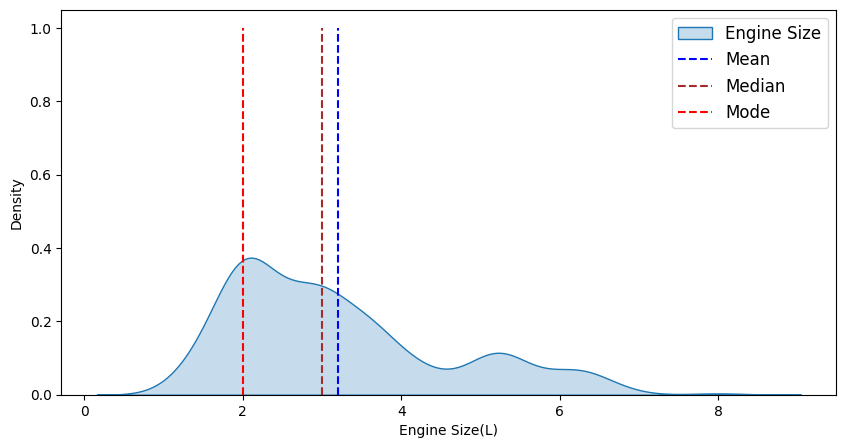

In [10]:
plt.figure(figsize=(10,5))
sns.kdeplot(engine_arr, shade=True)
plt.vlines(x=np.mean(engine_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(engine_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(engine_arr)[0][0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Engine Size', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Bisa dilihat bahwa distribusi bersifat `right skewed` karena lebih berat di kiri dan ekornya panjang di kanan. Berdasarkan visualisasi, `median`, `mean`, `modus` tidak selalu sama. Pada kasus ini, median dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data

Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan overlapping KDE plot.

Misal kita ingin membandingkan distribusi Engine Size pada Honda dan Hyundai.

C:\Users\frigas\AppData\Local\Temp\ipykernel_33040\2327207900.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(honda['Engine Size(L)'], shade=True)
C:\Users\frigas\AppData\Local\Temp\ipykernel_33040\2327207900.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hyundai['Engine Size(L)'], shade=True)


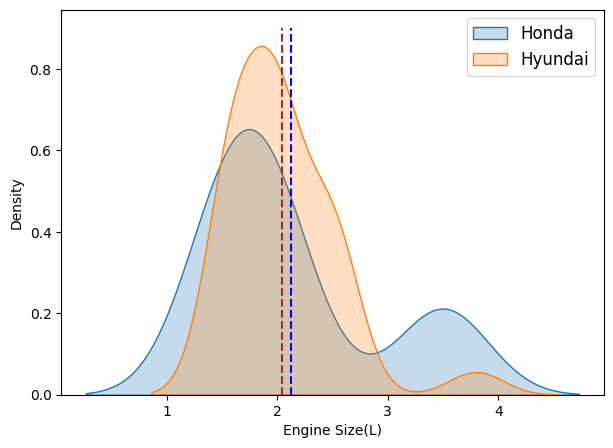

In [11]:
# KDE Plot
honda = df[df['Make'] == 'Honda']
hyundai = df[df['Make'] == 'Hyundai']
plt.figure(figsize=(7,5))
sns.kdeplot(honda['Engine Size(L)'], shade=True)
sns.kdeplot(hyundai['Engine Size(L)'], shade=True)
plt.legend(['Honda','Hyundai'], fontsize=12)
plt.vlines(x=honda['Engine Size(L)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=hyundai['Engine Size(L)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
plt.show()

# Correlation

Korelasi merupakan pengukuran dependensi antar atribut dalam data. Korelasi sering digunakan untuk mengukur apakah suatu atribut memiliki hubungan yang kuat secara linier atau tidak. 

Terdapat beberapa jenis korelasi yang dapat digunakan pada jenis data yang berbeda. ***Pearson correlation*** umum digunakan untuk mengukur korelasi pada atribut numerik.

In [12]:
df.corr(method='pearson')

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,0.971671,-0.927705,-0.490473
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,-0.520437,0.502625,1.000000


Dari korelasi pearson diatas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi (warna hijau gelap). Untuk membuktikan, dibawah terdapat 2 scatterplot yang menunjukkan hubungan linear dengan `Cylinders`, yakni
* `Engine Size(L)`: 0.92
* `CO2 Rating`: -0.77

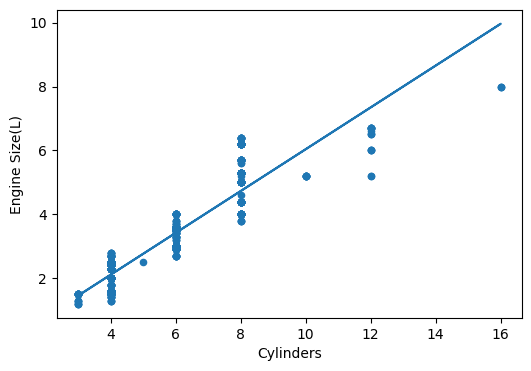

In [13]:
w = df["Cylinders"]
z = df["Engine Size(L)"]
df.plot.scatter(x="Cylinders", y="Engine Size(L)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

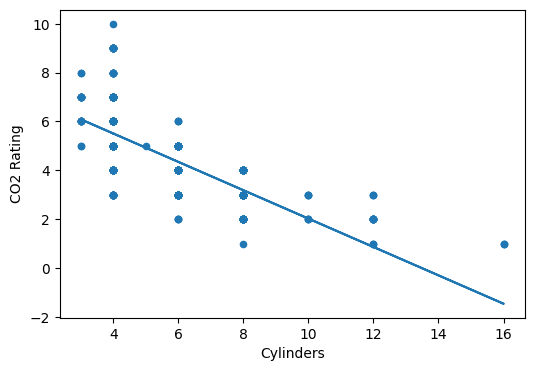

In [14]:
w = df["Cylinders"]
z = df["CO2 Rating"]
df.plot.scatter(x="Cylinders", y="CO2 Rating", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

<AxesSubplot:xlabel='count', ylabel='Make'>

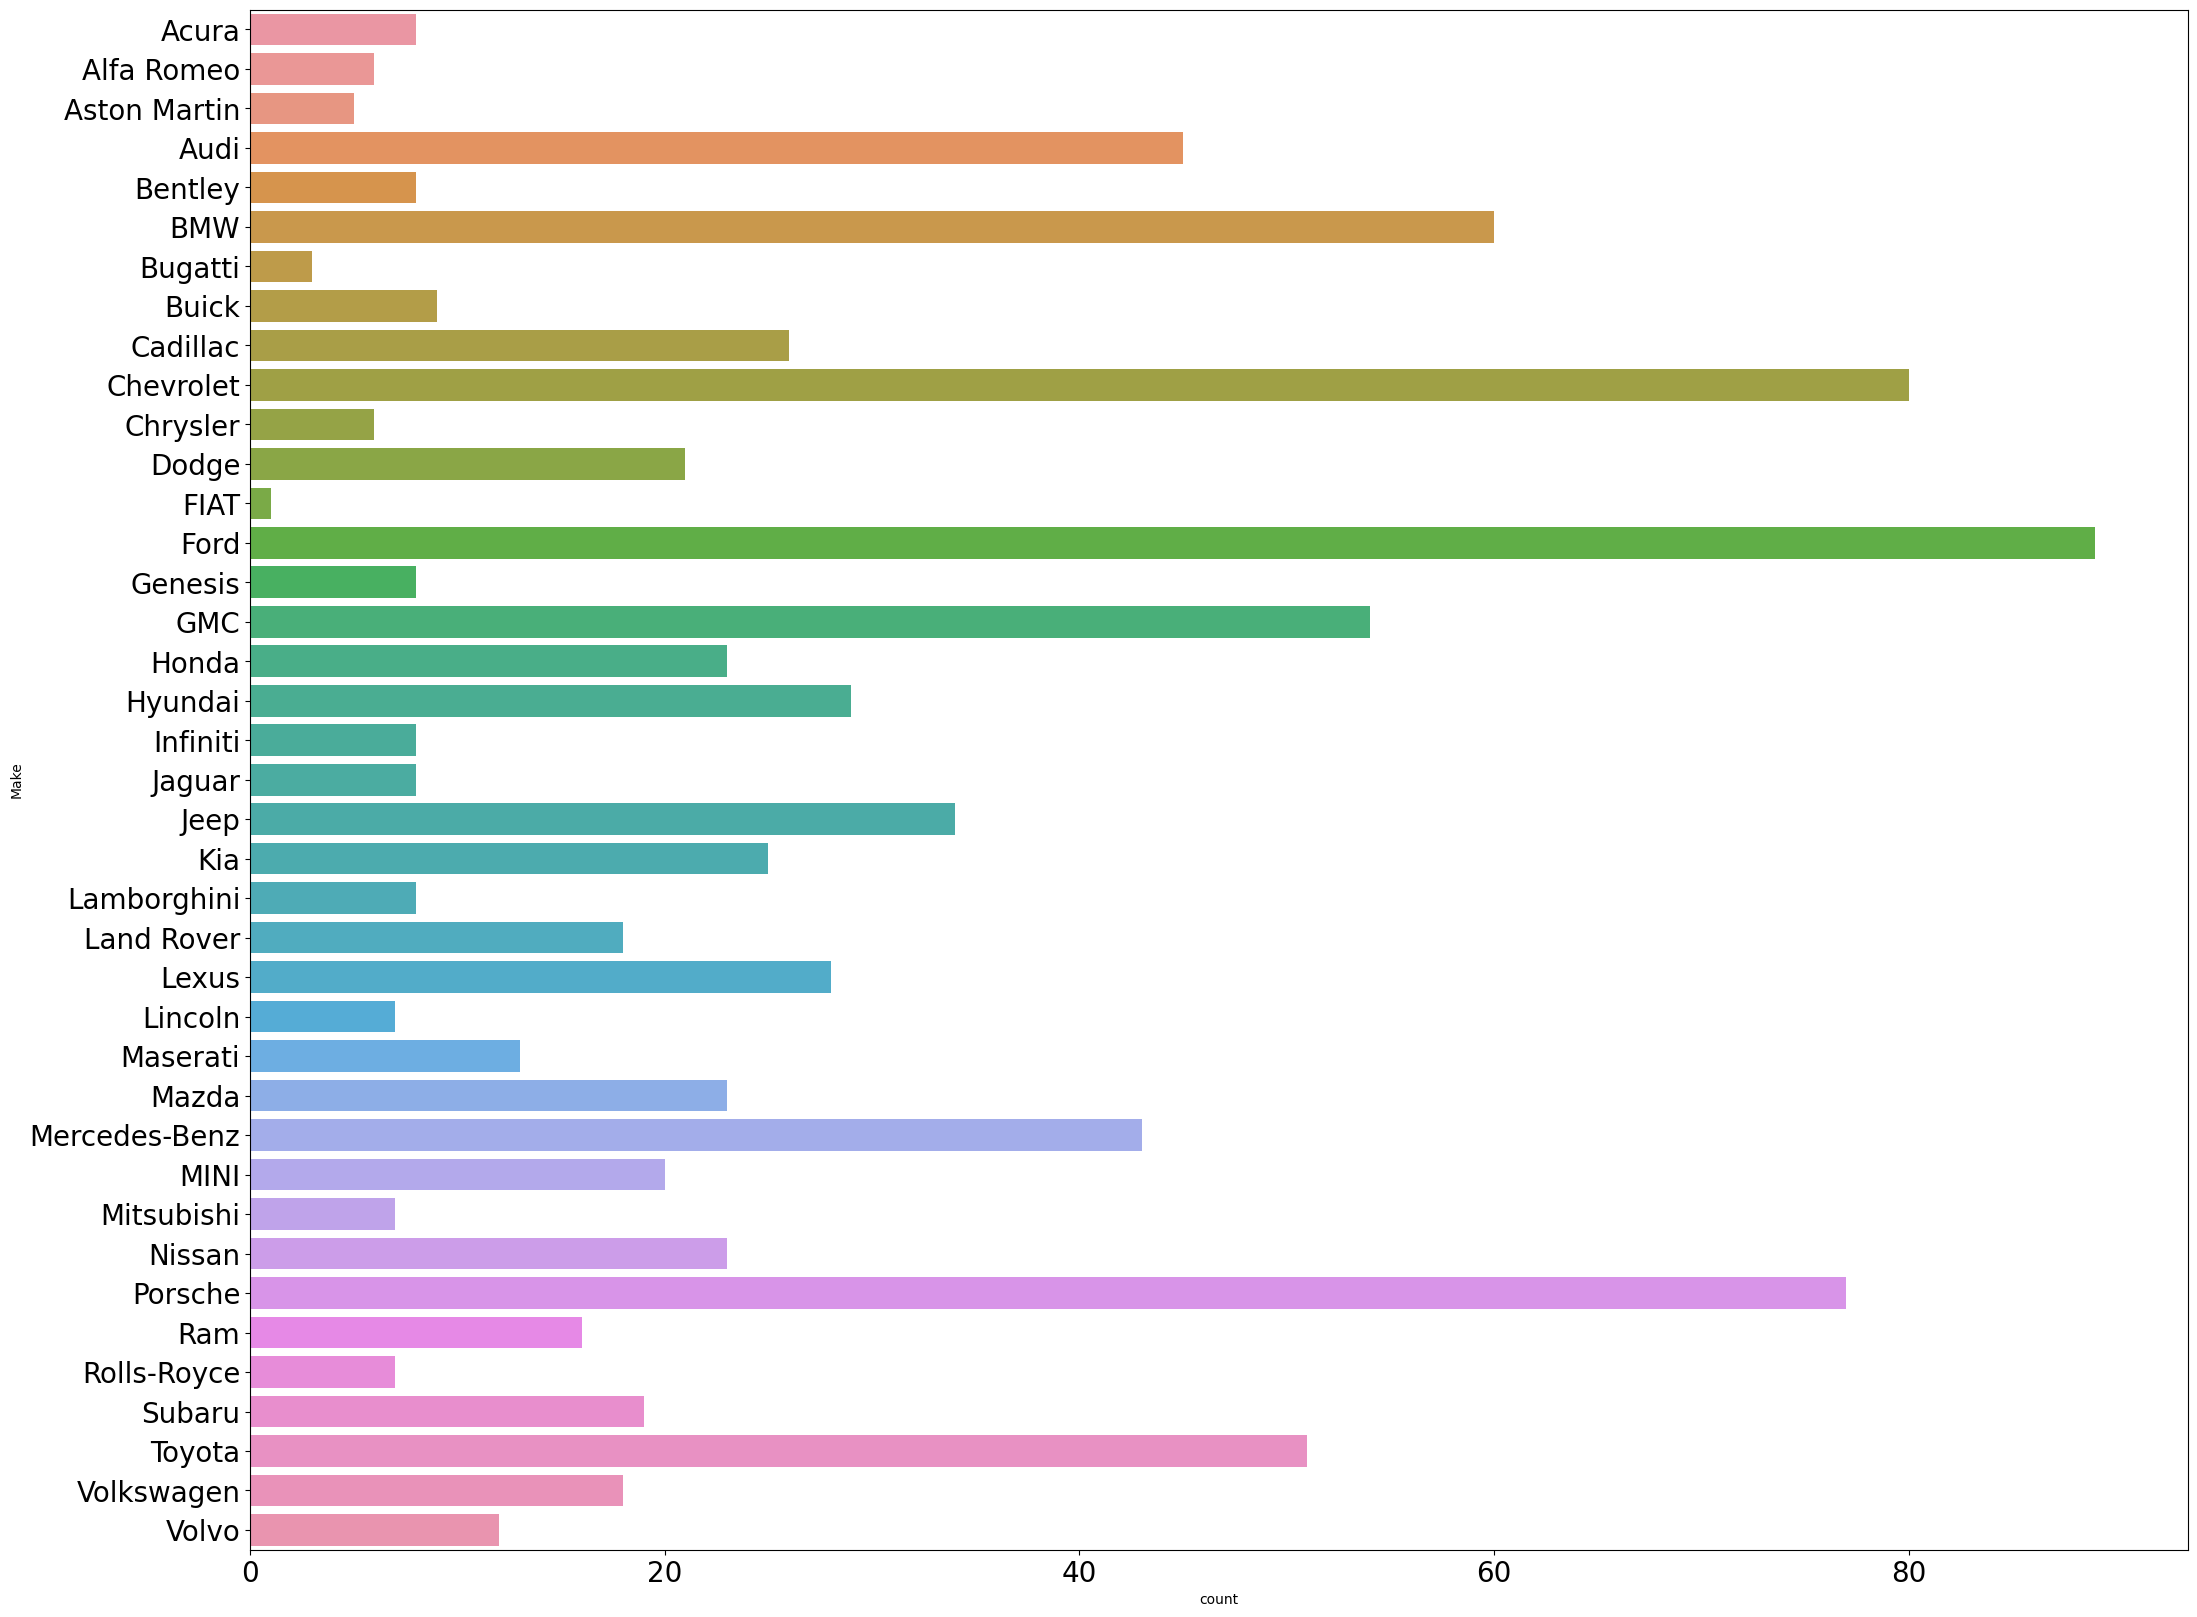

In [15]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
sns.countplot(y='Make', data=df)

Bisa kita lihat pada countplot di atas, Ford adalah brand mobil yang paling banyak digunakan di Kanada

<AxesSubplot:xlabel='count', ylabel='Transmission'>

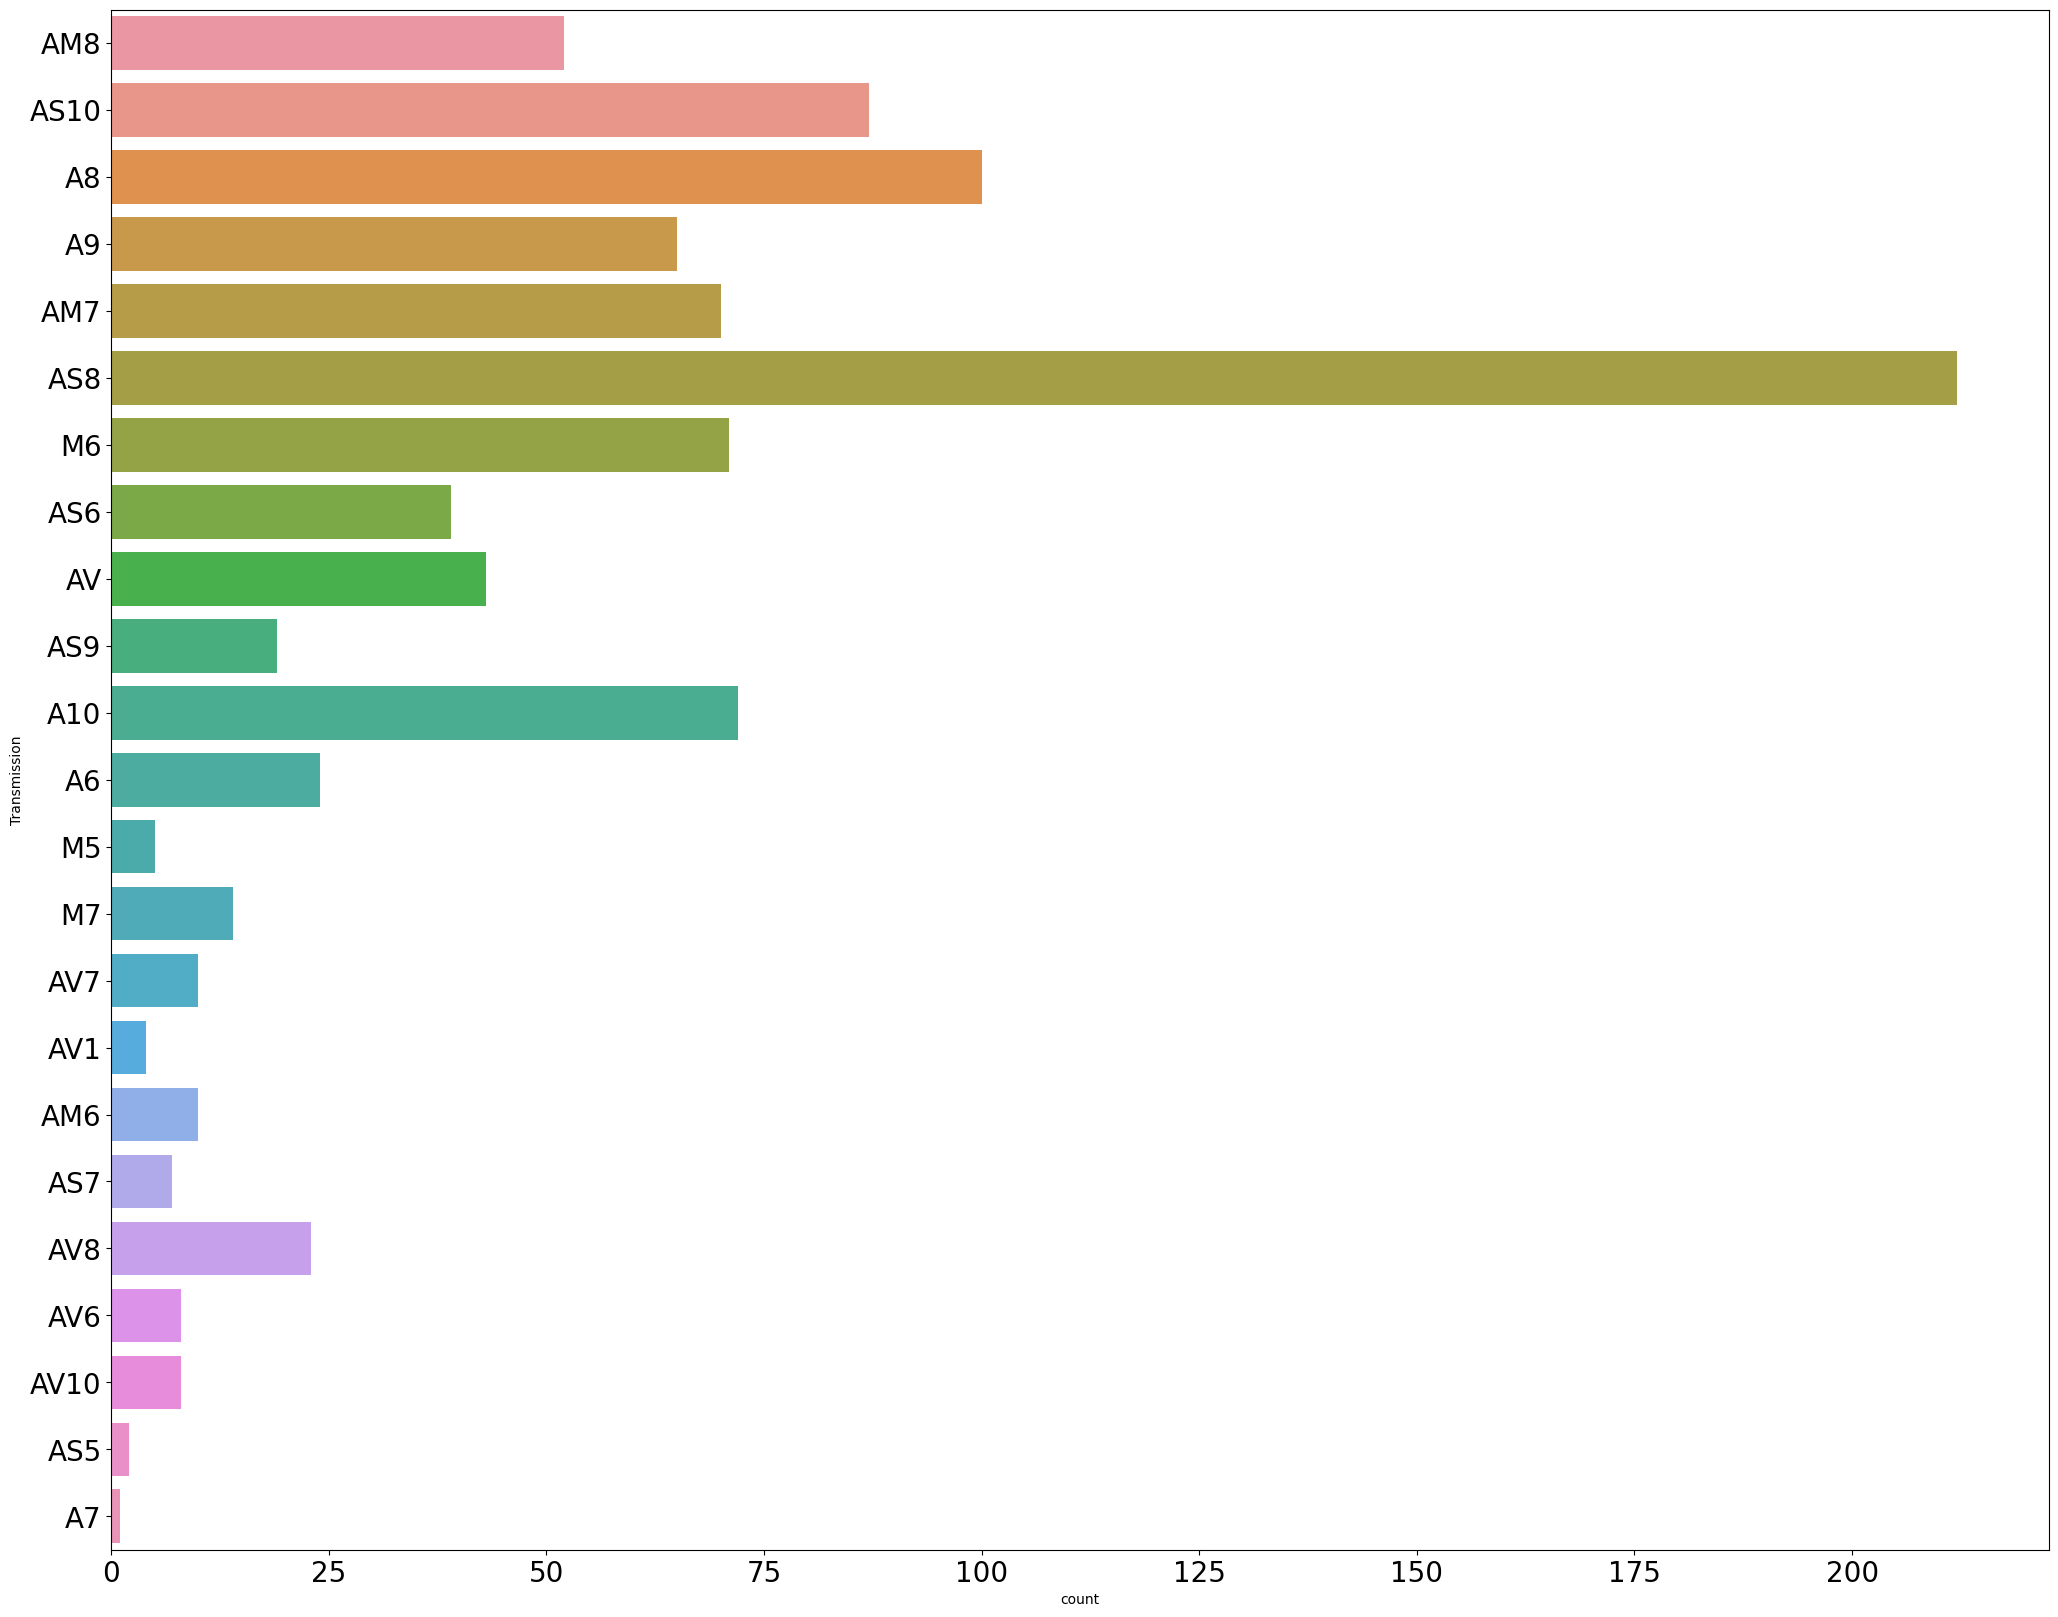

In [16]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks 
plt.xticks(size=20)
sns.countplot(y='Transmission', data=df)

Dari countplot, transmisi AS8 paling banyak digunakan, dan A7 paling sedikit

<AxesSubplot:xlabel='Make', ylabel='Engine Size(L)'>

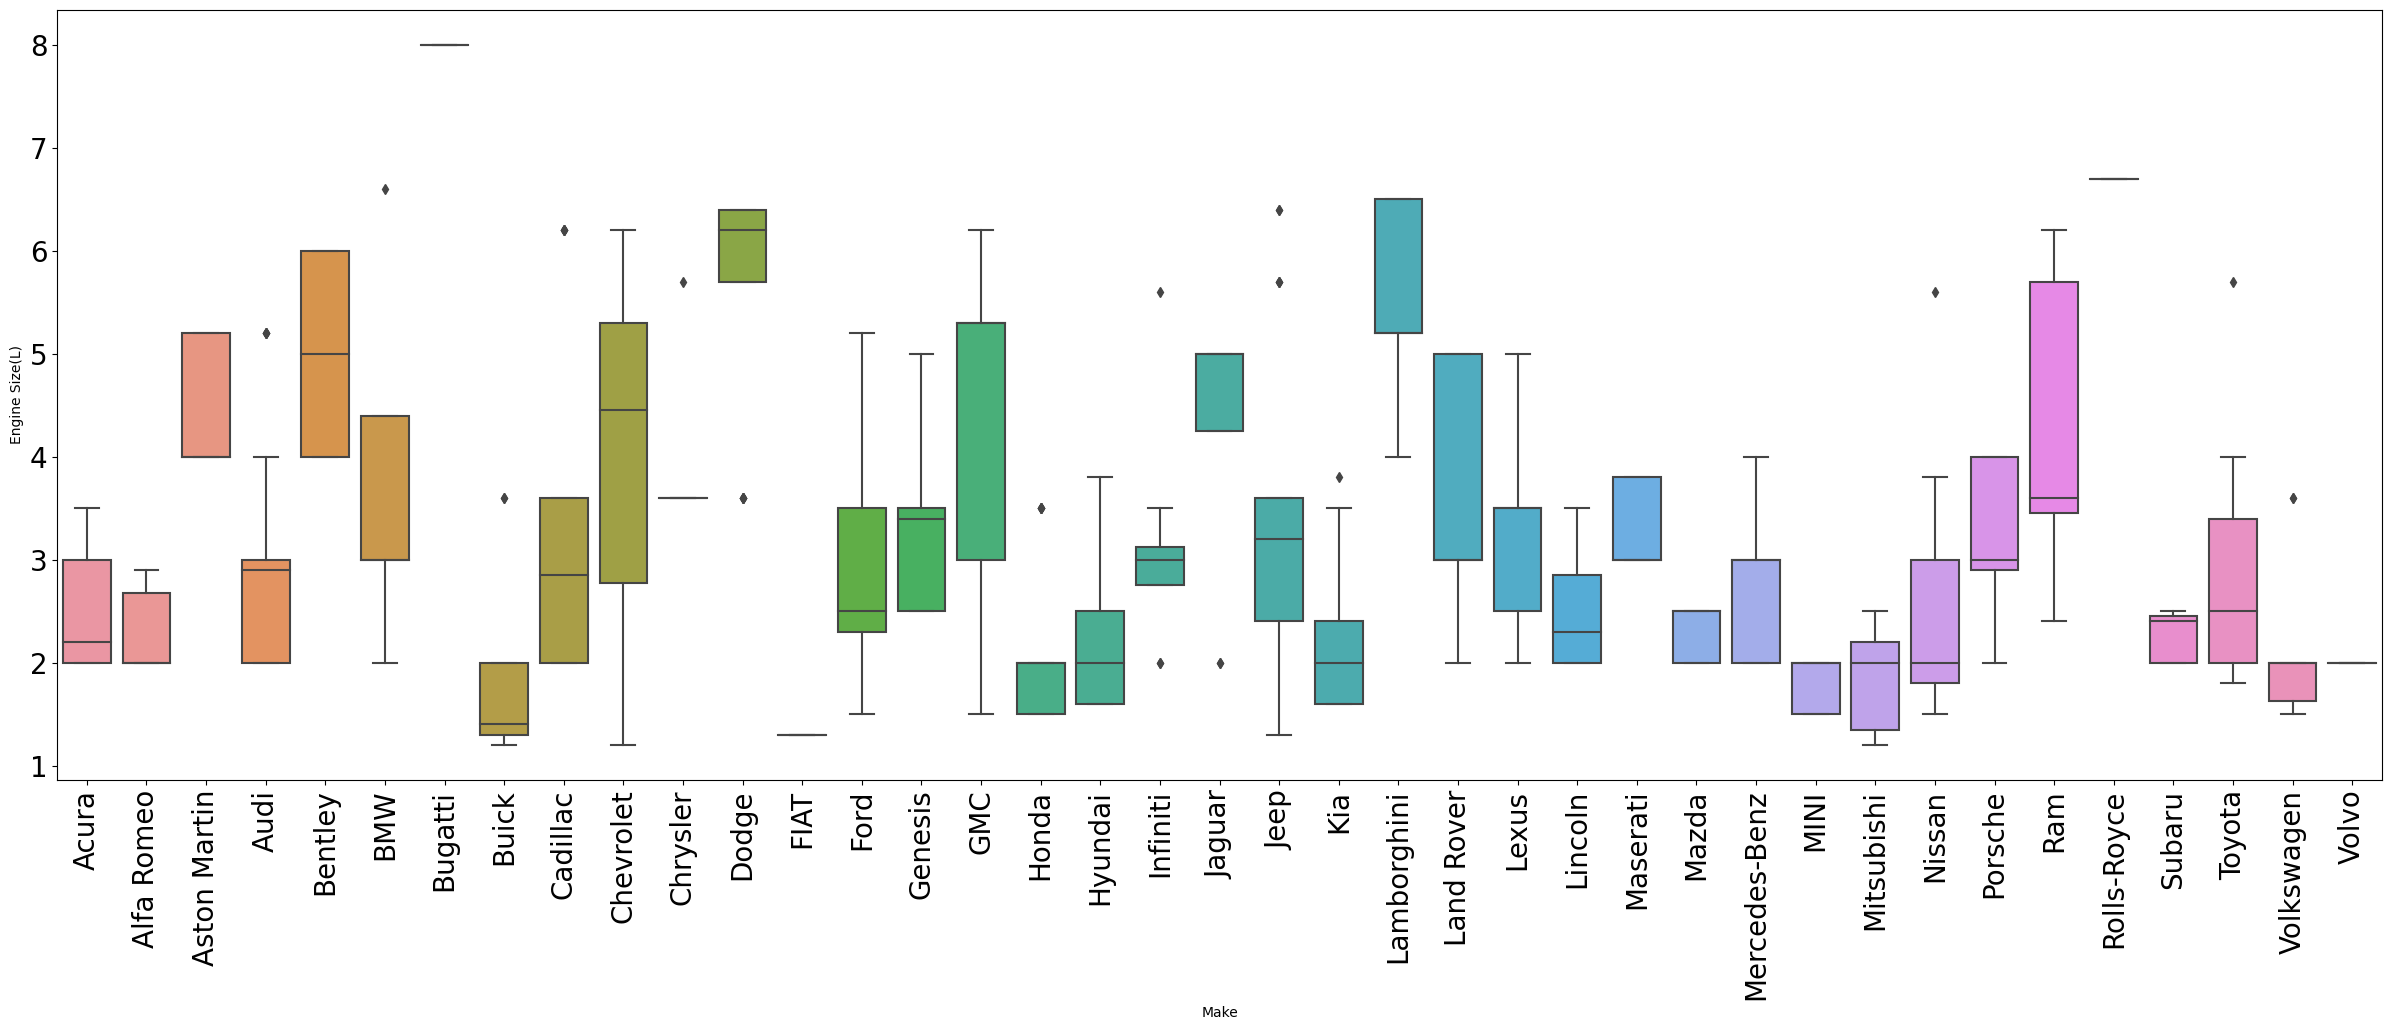

In [17]:
# Menampilkan boxplot Make terhadap Engine Size(L)
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Make', y='Engine Size(L)')

# Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut `CO2 Emissions(g/km)`! (hint: tambahkan range, Q1, Q2, Q3)

In [18]:
# Jawab
emissions = df["CO2 Emissions(g/km)"]

stats = [
    ['Mean', np.mean(emissions)],
    ['Median', np.median(emissions)],
    ['Mode', scp.mode(emissions)[0][0]],
    ['Standard Deviation', np.std(emissions)],
    ['Variance', np.var(emissions)],
    ['Minimum', np.min(emissions)],
    ['Maximum', np.max(emissions)],
    ['Range', np.max(emissions) - np.min(emissions)],
    ['Q1', np.quantile(emissions, .25)],
    ['Q2', np.quantile(emissions, .50)],
    ['Q3', np.quantile(emissions, .75)]
]

display(pd.DataFrame(stats, columns=['Measure', 'Value']))

C:\Users\frigas\AppData\Local\Temp\ipykernel_33040\3310650553.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ['Mode', scp.mode(emissions)[0][0]],


,Measure,Value
0,Mean,259.172304
1,Median,257.000000
2,Mode,275.000000
3,Standard Deviation,64.409079
4,Variance,4148.529508
5,Minimum,94.000000
6,Maximum,608.000000
7,Range,514.000000
8,Q1,213.250000
9,Q2,257.000000


(b) Apa central tendency paling cocok untuk atribut `CO2 Emissions(g/km)`? Berikan alasan!

C:\Users\frigas\AppData\Local\Temp\ipykernel_33040\2457143003.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  plt.vlines(x=scp.mode(emissions)[0][0], ymin=0, ymax=0.010, color='red', linestyle='--')


nilai skew : 0.5533439604626593


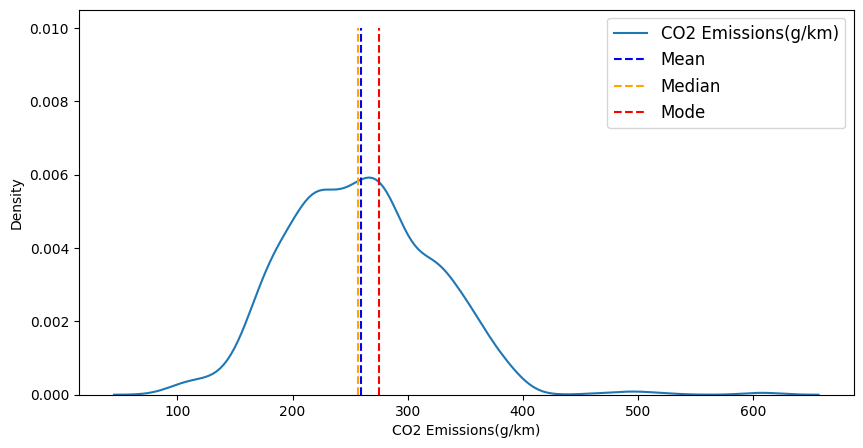

In [19]:
# Jawab

print("nilai skew : " + str(emissions.skew(axis= 0)))

plt.figure(figsize=(10,5))
sns.kdeplot(emissions)
plt.vlines(x=np.mean(emissions), ymin=0, ymax=0.010, color='blue', linestyle='--')
plt.vlines(x=np.median(emissions), ymin=0, ymax=0.010, color='orange', linestyle='--')
plt.vlines(x=scp.mode(emissions)[0][0], ymin=0, ymax=0.010, color='red', linestyle='--')
plt.legend(['CO2 Emissions(g/km)', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Setelah melihat persebaran data dan dengan perhitungan skewed yang cenderung ke kiri. Lalu, melihat data mean, median, dan mode yang berbeda-beda dengan pertimbangan bahwa mode > mean > median. Maka data yang cocok menjadi central tendency adalah median. Namun, disebabkan perbedaan nilai dari mean dan media yang tidak jauh penggunaan mean juga dinilai cocok. Dengan demikian median dan mean bisa disebut central tendency yang cocok dengan data di atas

(c) Buatlah heatmap dari korelasi pearson pada dataset `FuelConsumptionCO2.csv`!

<AxesSubplot:>

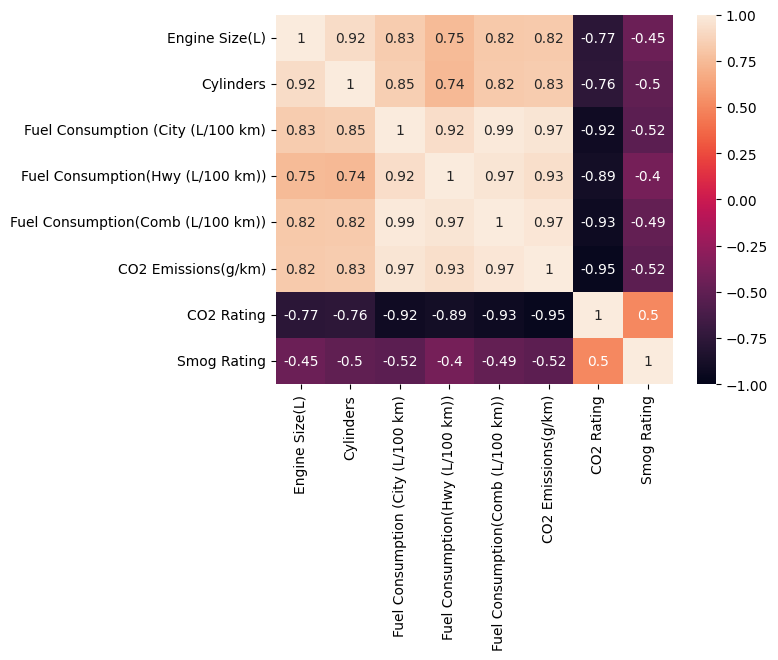

In [20]:
# Jawab
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

### **SOAL 2: Data Visualization**

Untuk setiap sub-soal, pilih salah satu dari visualisasi berikut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE Plot

Beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan.

**Secara eksplisit, tulis chart apa yang Anda pilih dan alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah rata-rata ukuran mesin yang dimiliki tiap brand mobil. Apakah mobil Dodge memiliki ukuran mesin terbesar?

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Make'>

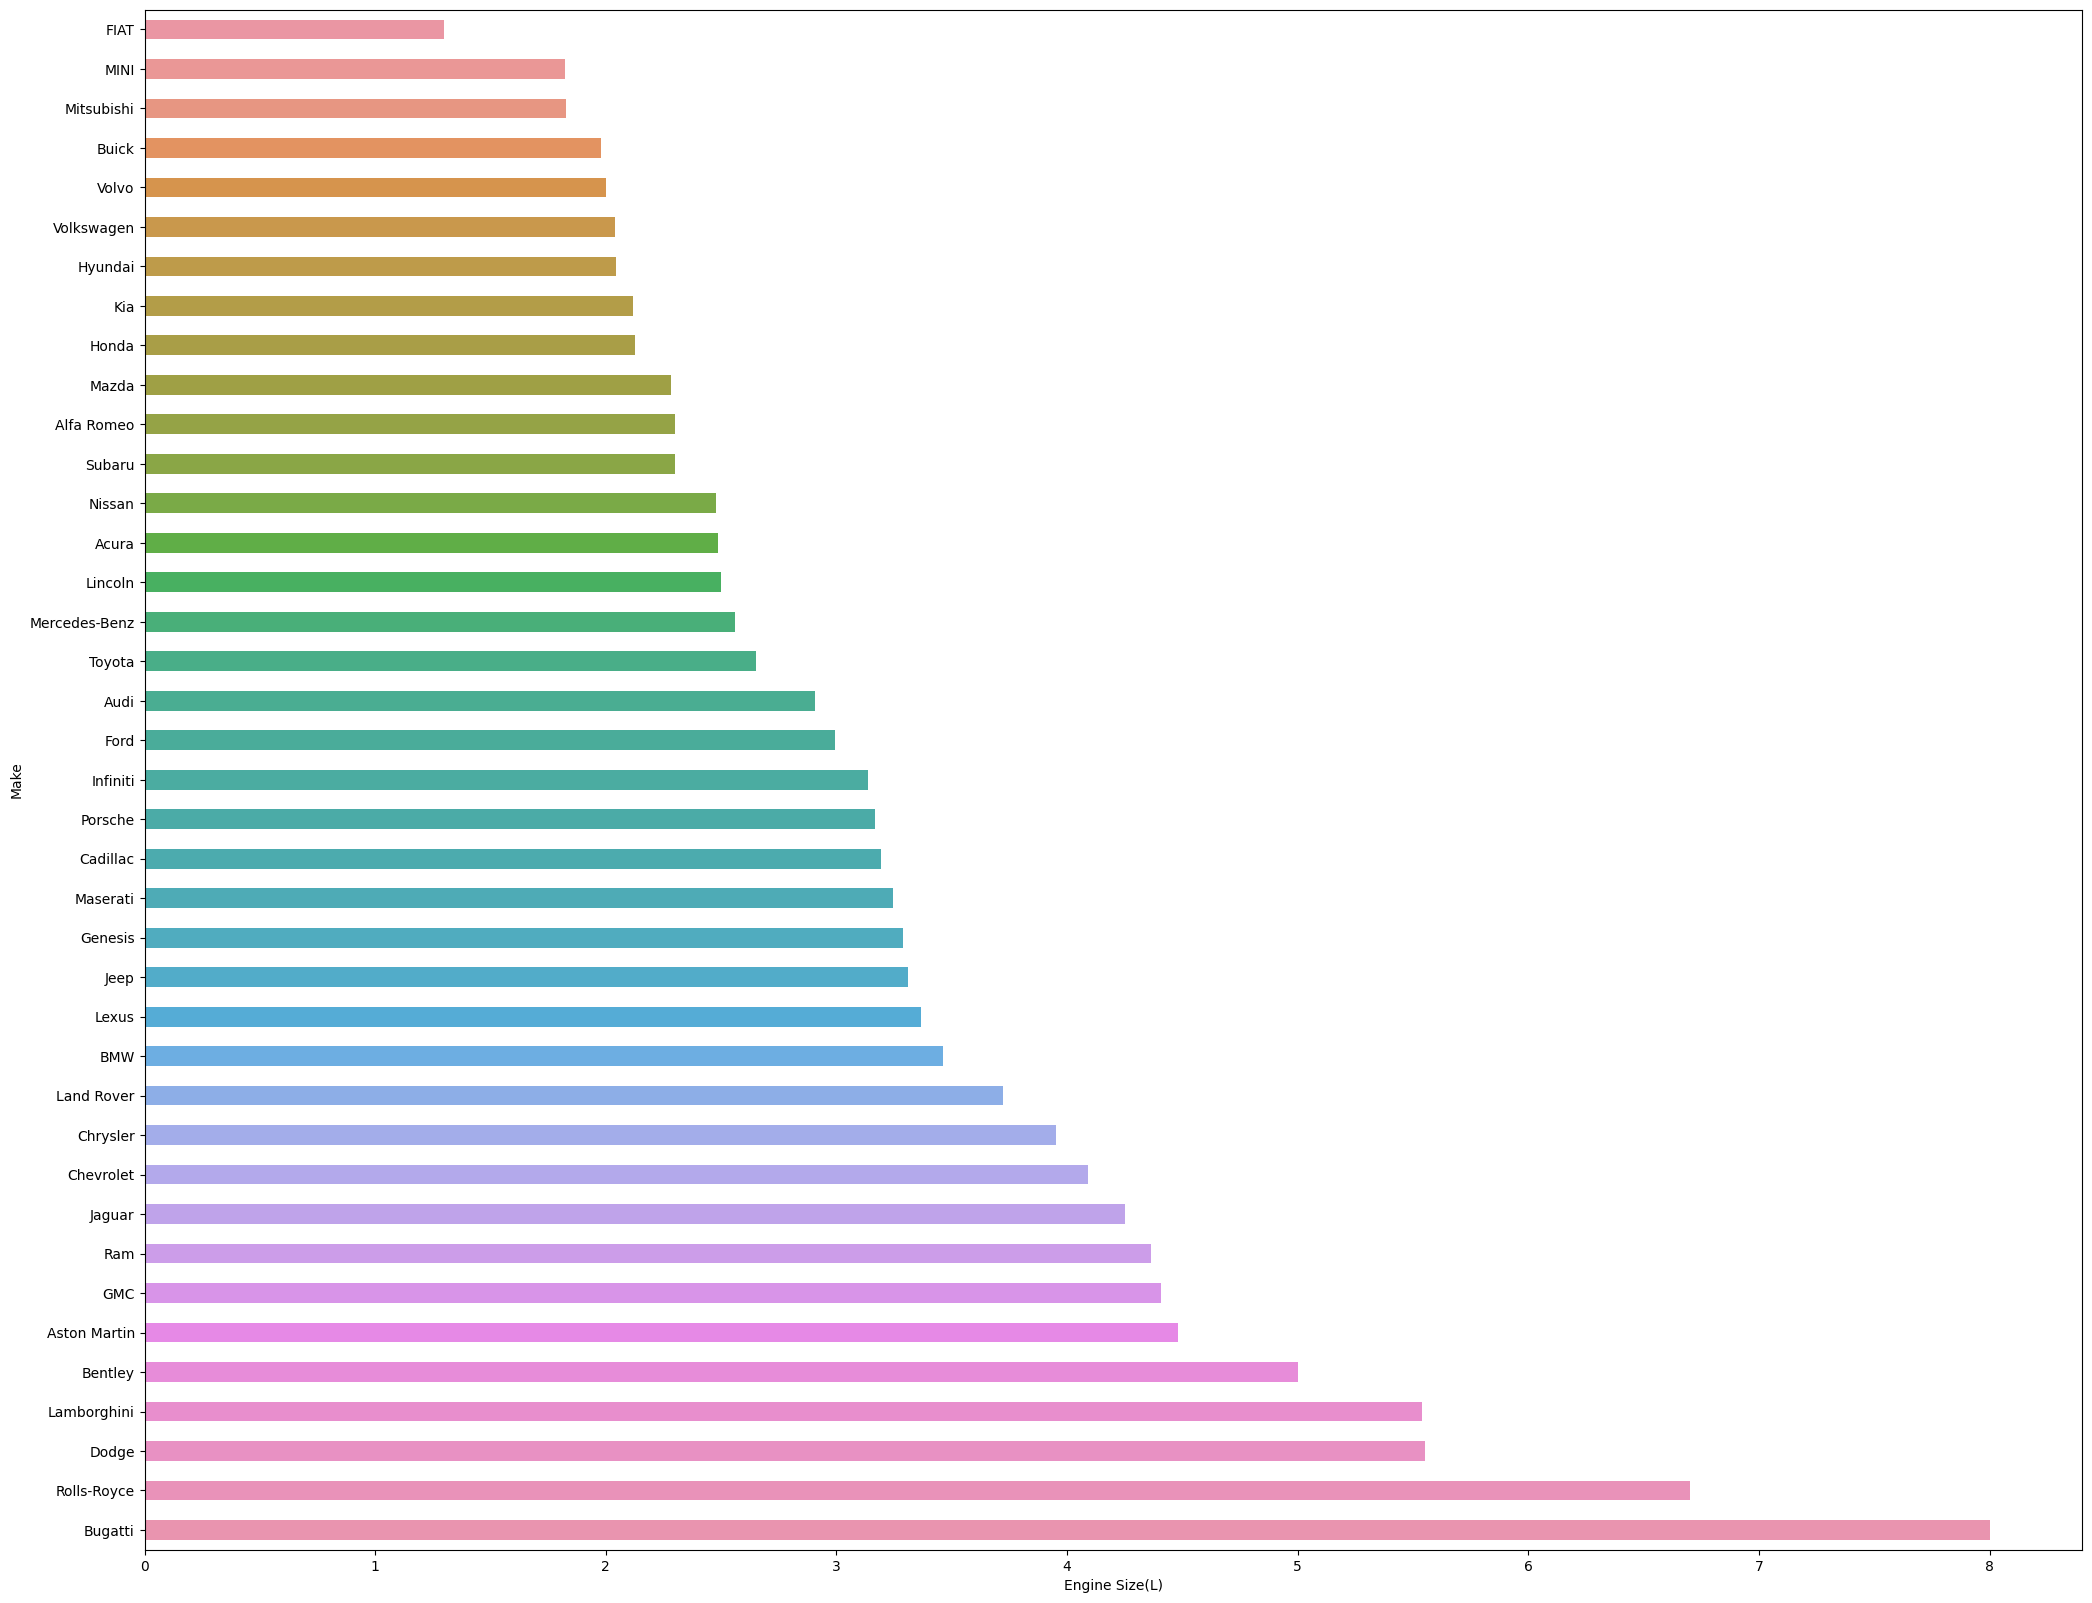

In [21]:
# Jawab
plt.figure(figsize=(25,20))
plt.yticks(size=10)

new_df = df.loc[:,["Make", "Engine Size(L)"]]
# display(new_df)

grouped_data = new_df.groupby("Make")['Engine Size(L)'].mean().reset_index()
grouped_data.sort_values(by="Engine Size(L)", inplace=True)
# display(grouped_data)

sns.barplot(data=grouped_data, x="Engine Size(L)", y="Make", width=0.5)





Ya, Bugatti memiliki rata-rata ukuran engine terbesar dibanding merk-merk lainnya. Saya memvisualisasikan data tersebut menggunakan bar chart karena merk-merk mobil di sini tidak memiliki keterhubungan. Selain itu, secara visualisasi juga lebih nyaman dipandang

(b) Buatlah visualisasi dari persentase mobil yang memiliki smog rating dengan nilai >= 7. Berapakah persentase dari mobil Eropa yang memiliki smog rating yang bernilai >= 7?

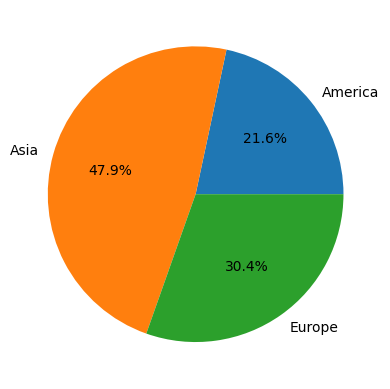

In [22]:
# Jawab

car_data = df.loc[df["Smog Rating"] >= 7]
# display(car_data)

grouped_data = car_data.groupby("Region")["Region"].count()
# display(grouped_data)

plt.pie(grouped_data, labels=grouped_data.keys(), autopct='%1.1f%%')
plt.show()


Persentase mobil eropa yang memiliki smog rating >= 7 adalah 30%. Saya menggunakan pie chart karena perlu memperlihatkan persentase dari setiap merk mobil dan juga region mobil tersebut

(c) Buatlah visualisasi untuk melihat apakah ada outliers di atribut `Engine Size(L)` untuk setiap transmisi. Berikan satu contoh transmisi yang terlihat memiliki outlier.

<AxesSubplot:xlabel='Transmission', ylabel='Engine Size(L)'>

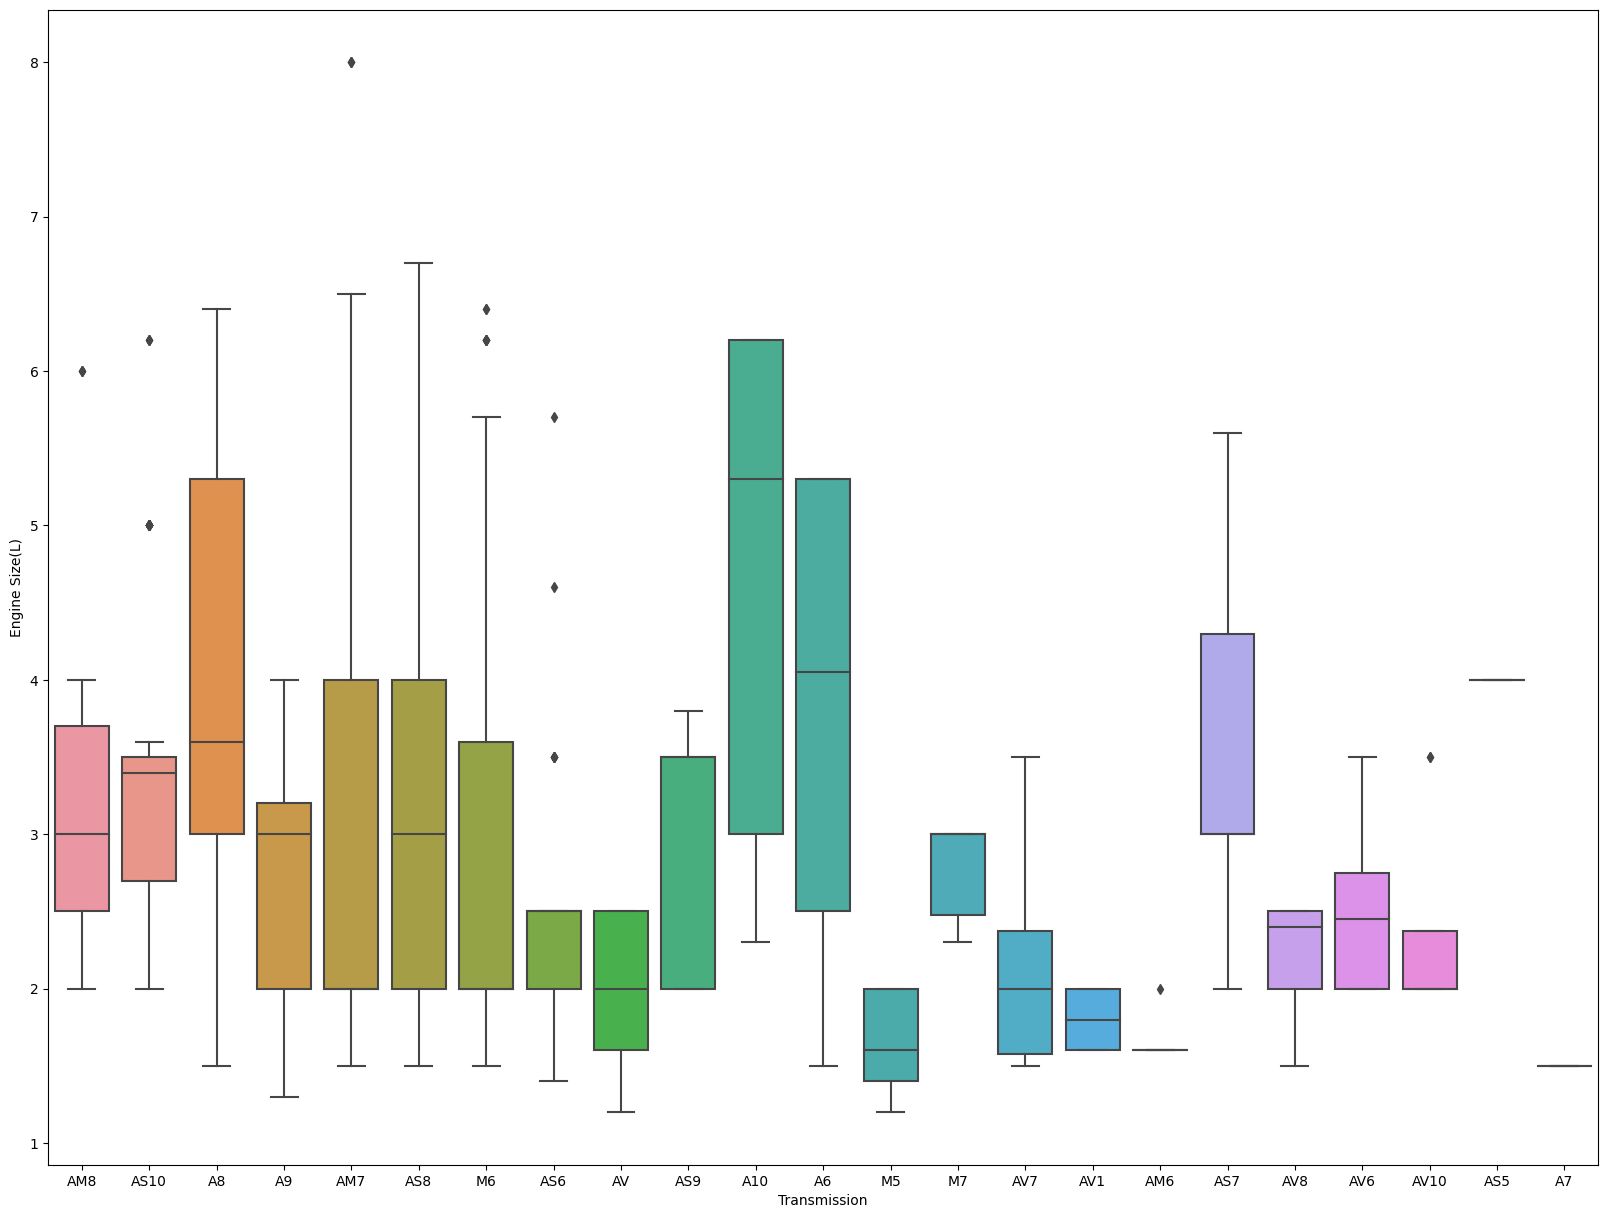

In [23]:
# jawab
plt.figure(figsize=(20,15))
new_df = df.loc[:,["Transmission", "Engine Size(L)"]]

sns.boxplot(data=new_df, x= "Transmission", y="Engine Size(L)")

Melihat visualisasi data di atas, kita ambil contoh dari transmisi AM8 yang memiliki engine zise(L) sebesar 6 sebagai data outlier. Selain itu, saya menggunakan box plot karena box plot dapat mengetahui rentan batas atas dan batas bawah sehingga memudahkan dalam melihat outlier

(d) Buatlah visualisasi untuk melihat pola atau pattern antara Engine Size(L) dan Fuel Consumption(Comb (L/100 km)). **Menurut Anda, apa hubungan yang dimiliki antara Engine Size dan Fuel Consumption? Jelaskan!**

<Figure size 5000x3000 with 0 Axes>

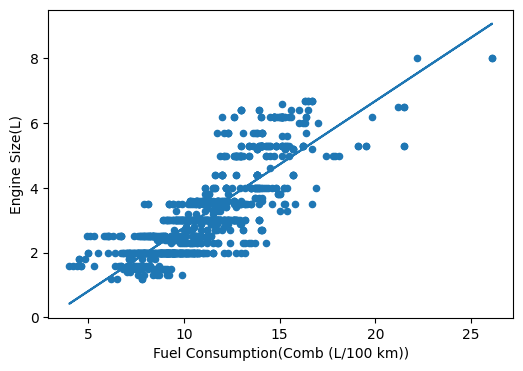

In [24]:
# Jawab
plt.figure(figsize=(50,30))
w = df["Fuel Consumption(Comb (L/100 km))"]
z = df["Engine Size(L)"]
df.plot.scatter(x="Fuel Consumption(Comb (L/100 km))", y="Engine Size(L)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

Pattern yang didapat adalah Konsumsi Bahan Bakar berbanding lurus dengan nilai Engine Sizenye, sehingga apabila memiliki engine size yang besar pasti konsumsi bahan bakarnya juga tinggi. Selain itu, dengan bantuan scatter plot dapat memudahkan dalam melihat korelasi dari kedua variable tersebut

(e) Visualisasikan distribusi data CO2 Emissions pada BMW dan Mercedes-Benz. Berikan analisis Anda!

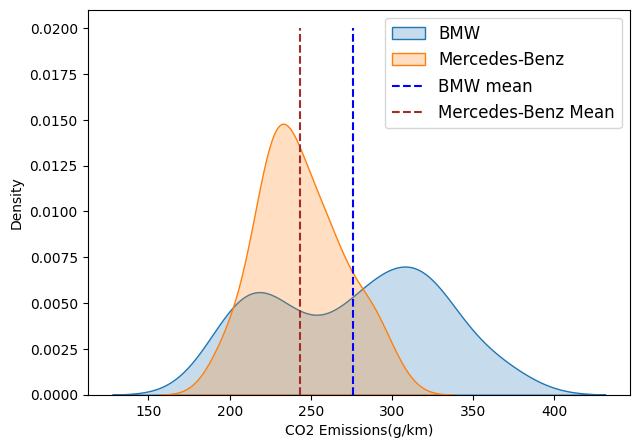

In [25]:
# Jawab

bmw = df[df['Make'] == 'BMW']
mercy = df[df['Make'] == 'Mercedes-Benz']
plt.figure(figsize=(7,5))
sns.kdeplot(bmw['CO2 Emissions(g/km)'], fill=True)
sns.kdeplot(mercy['CO2 Emissions(g/km)'], fill=True)
plt.vlines(x=bmw['CO2 Emissions(g/km)'].mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=mercy['CO2 Emissions(g/km)'].mean(), ymin=0, ymax=0.02, color='brown', linestyle='--')
plt.legend(['BMW','Mercedes-Benz', 'BMW mean', 'Mercedes-Benz Mean'], fontsize=12)
plt.show()



Dengan melihat visualisasi di atas, mercedes-benz memiliki density tertinggi di rentan 200-250 sedangkan BMW memiliki density tertinggi di rentan 300-350. Oleh karena itu, rata-rata CO2 Emissions(g/km) yang dikeluarkan BMW lebih besar dibanding Mercedes-Benz. Saya menggunakan kde plot untuk membandingkan kedua distribusi data tersebut, sehingga mudah untuk melihat perbandingan dari distrbusi data-datanya

(f) Buatlah visualisasi untuk mengetahui brand mobil Asia mana yang memiliki rata rata `Fuel Consumption(Comb (L/100 km))` yang paling rendah (paling irit). Apa yang membuat brand mobil tersebut irit? `hint: Gunakan Descriptive Statistics`

<AxesSubplot:xlabel='Fuel Consumption(Comb (L/100 km))', ylabel='Make'>

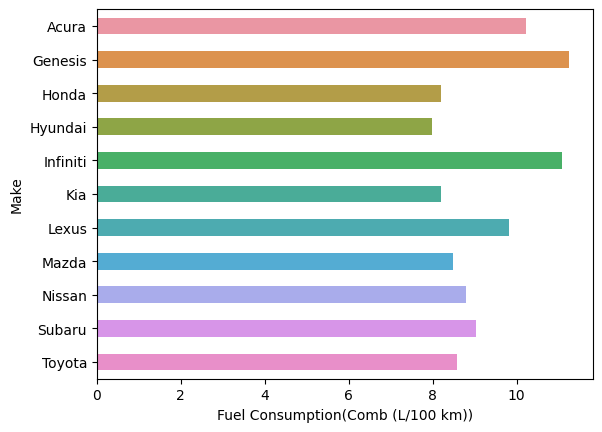

In [26]:
# Jawab
asia_car = df.loc[df["Region"] == "Asia"]
group_data = asia_car.groupby("Make")["Fuel Consumption(Comb (L/100 km))"].mean().reset_index()
sns.barplot(data=group_data, x="Fuel Consumption(Comb (L/100 km))", y="Make", width=0.5)


Dari visualisai di atas, dengan melihat rata-rata Fuel Consumption(Comb (L/100 km)). Didapatkan bahwa Hyundai memiliki nilai rata - rata terkecil. Saya memvisualisasikan data tersebut menggunakan bar chart karena merk-merk mobil di sini tidak memiliki keterhubungan. Selain itu, secara visualisasi juga lebih nyaman dipandang

<AxesSubplot:>

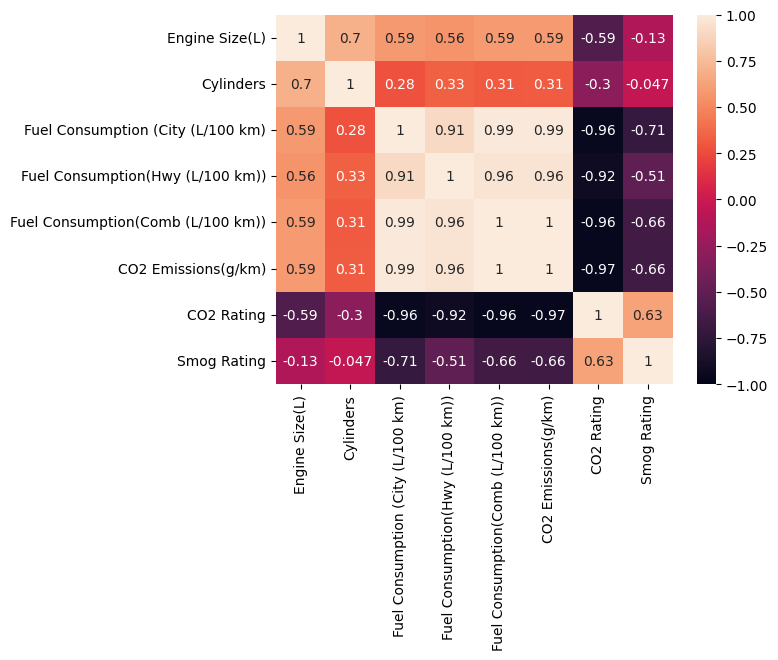

In [27]:
temp_group_data = asia_car.loc[asia_car["Make"] == "Hyundai"]
sns.heatmap(temp_group_data.corr(), vmin=-1, vmax=1, annot=True)

Setelah mengetahui Hyundai yang memiliki rata-rata Fuel Consumption(Comb (L/100 km)) terkecil, kita melihat korelasi dengan variabel lainnya. Dengan demikian, didapatkan bahwa terdapat hubungan yang tinggi dengan CO2 Emissions(g/km), Engine Size(L), dan Cylinders. Namun, saya tidak menganalisis CO2 Emissions(g/km) disebabkan tidak ada hubungan sama sekali dengan mesin atau input mobil. CO2 Emissions (g/km) merupakan hasil dari proses mesin bekerja, sehingga tidak memiliki pengaruh. Dengan demikian, saya mencoba menampilkan scatter plot dari Engine Size(L) dan Cylinders.

<Figure size 5000x3000 with 0 Axes>

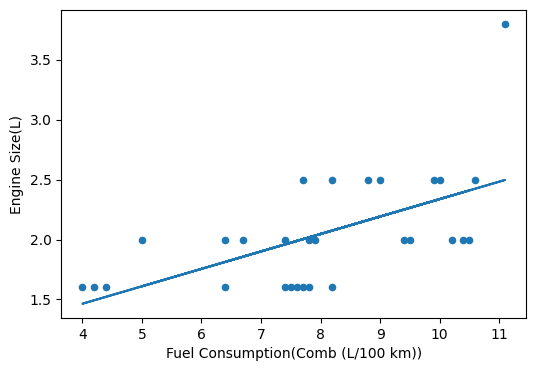

In [28]:
plt.figure(figsize=(50,30))
w = temp_group_data["Fuel Consumption(Comb (L/100 km))"]
z = temp_group_data["Engine Size(L)"]
temp_group_data.plot.scatter(x="Fuel Consumption(Comb (L/100 km))", y="Engine Size(L)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

<Figure size 5000x3000 with 0 Axes>

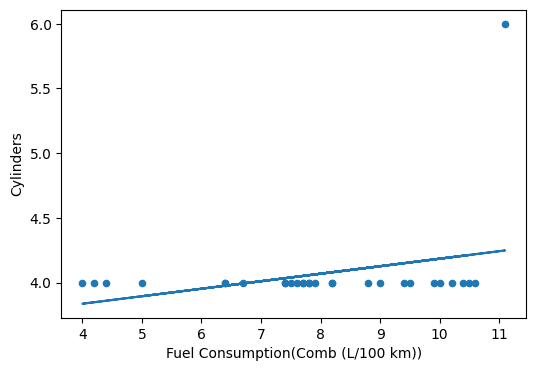

In [29]:
plt.figure(figsize=(50,30))
w = temp_group_data["Fuel Consumption(Comb (L/100 km))"]
z = temp_group_data["Cylinders"]
temp_group_data.plot.scatter(x="Fuel Consumption(Comb (L/100 km))", y="Cylinders", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

Setelah melihat persebaran data-data terhadap variabel-variabel yang mau dianalisis. Saya mencoba menampilkan dengan barplot untuk mengetahui apakah hyundai juga memiliki rata-rata terkecil di kedua variable tersebut.

<AxesSubplot:xlabel='Engine Size(L)', ylabel='Make'>

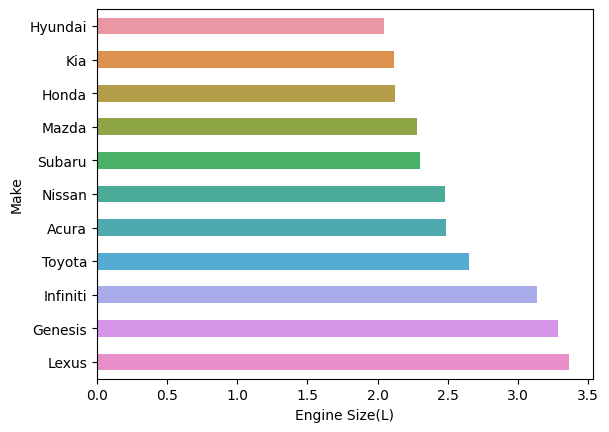

In [31]:
group_data = asia_car.groupby("Make")["Engine Size(L)"].mean().reset_index()
group_data.sort_values(by="Engine Size(L)", inplace=True)
sns.barplot(data=group_data, x="Engine Size(L)", y="Make", width=0.5)

Setelah itu, saya coba mencari tau persebaran Engine Size(L) dari merek Hyundai ini

<AxesSubplot:xlabel='Engine Size(L)', ylabel='count'>

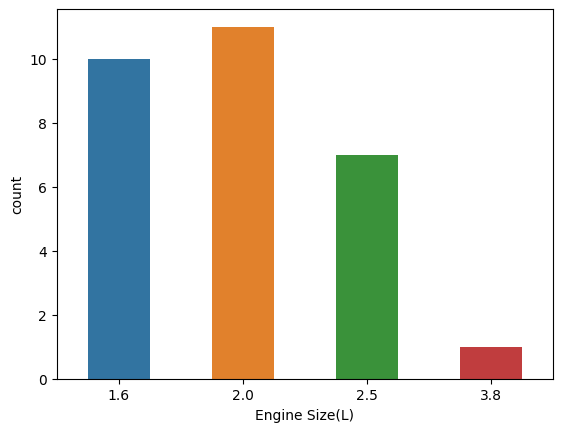

In [32]:
temp_group_data = asia_car.loc[asia_car["Make"] == "Hyundai"]
sns.countplot(data=temp_group_data, x="Engine Size(L)", width=0.5)

Diketahui Engine Size(L) terbanyak yang dimiliki oleh Hyundai adalah 2.0. Coba kita bandingkan dengan rata-rata Fuel Consumption dari seluruh mobil asia yang menggunakan berbagai Engine Size(L) di atas

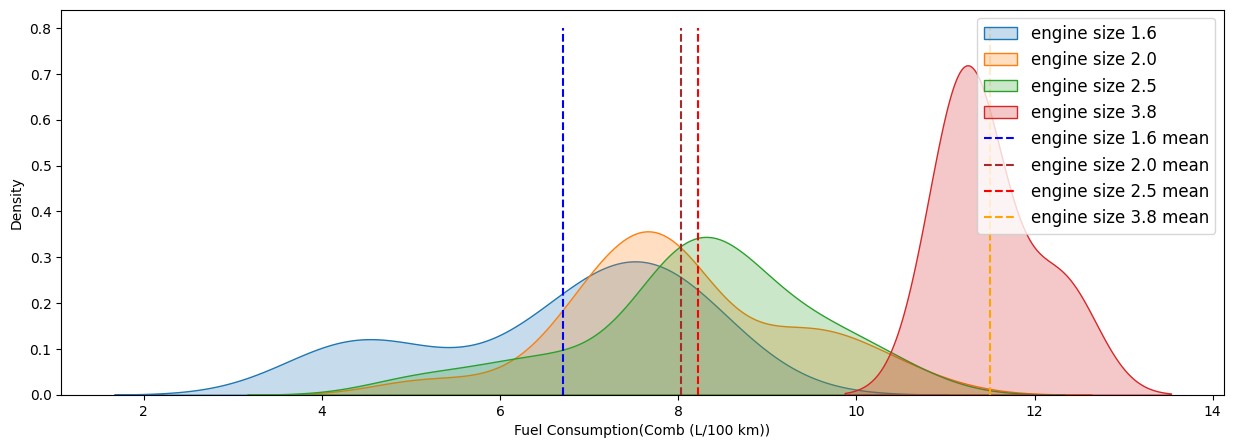

In [33]:
eng_size_1 = asia_car[asia_car['Engine Size(L)'] == 1.6]
eng_size_2 = asia_car[asia_car['Engine Size(L)'] == 2.0]
eng_size_3 = asia_car[asia_car['Engine Size(L)'] == 2.5]
eng_size_4 = asia_car[asia_car['Engine Size(L)'] == 3.8]
plt.figure(figsize=(15,5))
sns.kdeplot(eng_size_1['Fuel Consumption(Comb (L/100 km))'], fill=True)
sns.kdeplot(eng_size_2['Fuel Consumption(Comb (L/100 km))'], fill=True)
sns.kdeplot(eng_size_3['Fuel Consumption(Comb (L/100 km))'], fill=True)
sns.kdeplot(eng_size_4['Fuel Consumption(Comb (L/100 km))'], fill=True)
plt.vlines(x=eng_size_1['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.8, color='blue', linestyle='--')
plt.vlines(x=eng_size_2['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.8, color='brown', linestyle='--')
plt.vlines(x=eng_size_3['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.8, color='red', linestyle='--')
plt.vlines(x=eng_size_4['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.8, color='orange', linestyle='--')
plt.legend(['engine size 1.6','engine size 2.0','engine size 2.5', 'engine size 3.8', 'engine size 1.6 mean','engine size 2.0 mean','engine size 2.5 mean', 'engine size 3.8 mean'], fontsize=12)
plt.show()

Dari dari rata-rata data distribusi di atas, diketahui bahwa semakin kecil jenis engine size(L) maka semakin kecil Fuel Consumption(Comb (L/100 km))

<AxesSubplot:xlabel='Cylinders', ylabel='Make'>

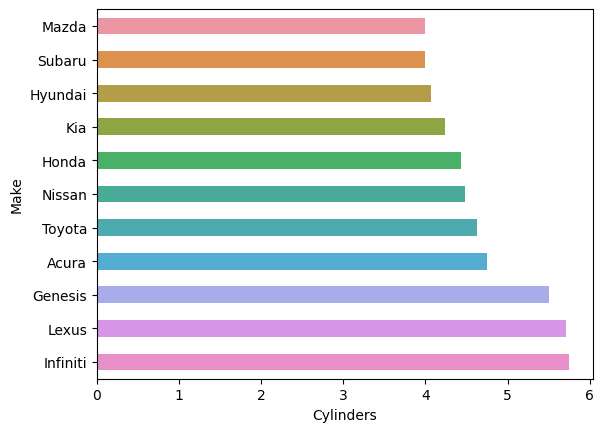

In [34]:
group_data = asia_car.groupby("Make")["Cylinders"].mean().reset_index()
group_data.sort_values(by="Cylinders", inplace=True)
sns.barplot(data=group_data, x="Cylinders", y="Make", width=0.5)

Setelah itu, saya coba mencari persebaran data dari Cylinders yang digunakan oleh Hyundai

<AxesSubplot:xlabel='Cylinders', ylabel='count'>

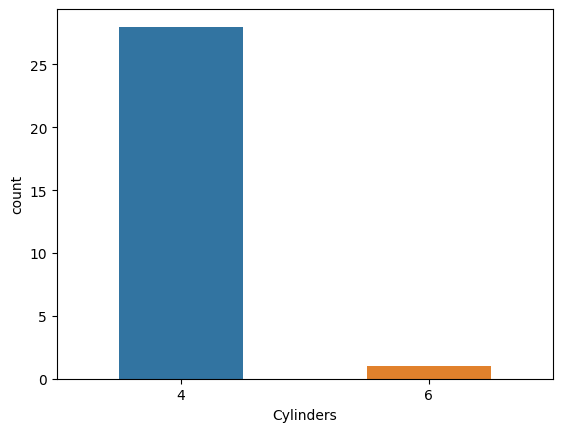

In [35]:
temp_group_data = asia_car.loc[asia_car["Make"] == "Hyundai"]
sns.countplot(data=temp_group_data, x="Cylinders", width=0.5)

Diketahui bahwa, Hyundai paling banyak menggunakan Cylinders 4 pada mobil-mobil yang dimilikinya. Lalu, coba kita cari tahu pengaruhnya dengan Fuel Consumption(Comb (L/100 km))

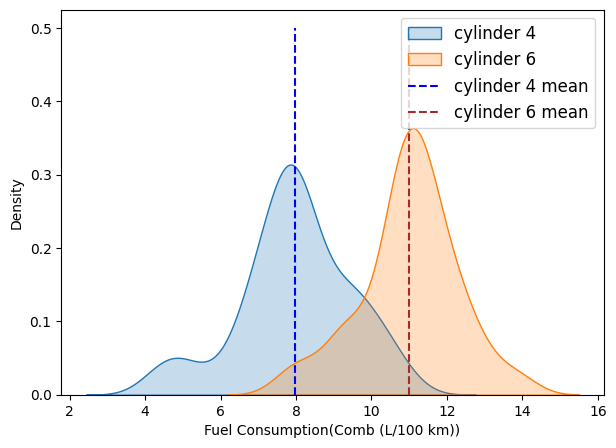

In [36]:
cy4 = asia_car[asia_car['Cylinders'] == 4]
cy6 = asia_car[asia_car['Cylinders'] == 6]
plt.figure(figsize=(7,5))
sns.kdeplot(cy4['Fuel Consumption(Comb (L/100 km))'], fill=True)
sns.kdeplot(cy6['Fuel Consumption(Comb (L/100 km))'], fill=True)
plt.vlines(x=cy4['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.5, color='blue', linestyle='--')
plt.vlines(x=cy6['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.5, color='brown', linestyle='--')
plt.legend(['cylinder 4','cylinder 6','cylinder 4 mean', 'cylinder 6 mean'], fontsize=12)
plt.show()

Dari dari rata-rata data distribusi di atas, diketahui bahwa semakin kecil jenis cylindernya maka semakin kecil Fuel Consumption(Comb (L/100 km)).

Saya memvisualisasikan kedua data tersebut menggunakan bar chart karena merk-merk mobil di sini tidak memiliki keterhubungan dan ingin menampilkan jumlah data atau pun rata-rata data. Lalu saya menggunakan kde plot untuk membandingkan dua variable yang ingin ditinjau lebih jauh, sehingga lebih mudah untuk mengetahui perbandingannya

Dengan melihat kedua variable tersebut, variable yang memiliki hubungan adalah Engine Size(L) dan Cylinders. Selain itu, saya coba melakukan perbandingan data-data kualitatif yang dimiliki oleh mobil hyundai, yaitu fuel type karena berdasarkan sumebr yang saya baca jenis bahan bakar memiliki pengaruh terhadap konsumsi bahan bakar

Referensi : https://media.neliti.com/media/publications/115041-ID-hubungan-jenis-bahan-bakar-dengan-konsum.pdf

<AxesSubplot:xlabel='Fuel Type', ylabel='count'>

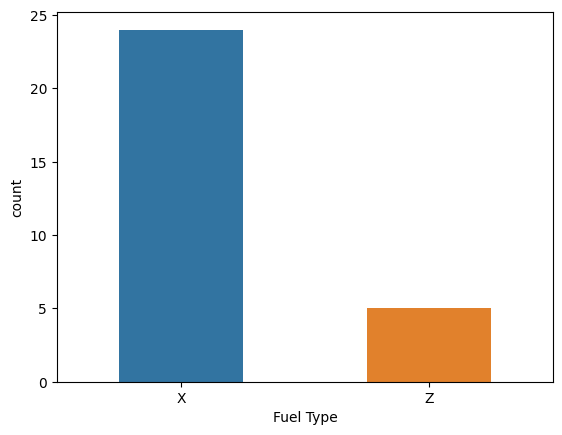

In [37]:
temp_group_data = asia_car.loc[asia_car["Make"] == "Hyundai"]
sns.countplot(data=temp_group_data, x="Fuel Type", width=0.5)


Dari keseluruhan mobil berjenis hyundai, Fuel Type berjenis X lebih banyak digunakan daripada Fuel Type berjenis Z. Oleh karena itu coba kita melakukan pengecekan rata-rata Fuel Consumption dari seluruh mobil asia dengan fuel type X dan Z

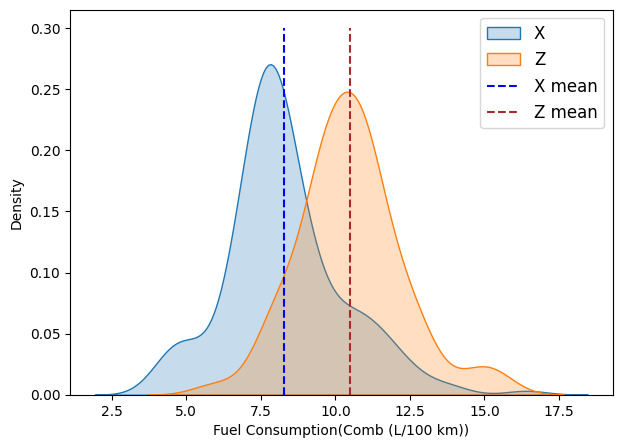

In [38]:
X = asia_car[asia_car['Fuel Type'] == 'X']
Z = asia_car[asia_car['Fuel Type'] == 'Z']
plt.figure(figsize=(7,5))
sns.kdeplot(X['Fuel Consumption(Comb (L/100 km))'], fill=True)
sns.kdeplot(Z['Fuel Consumption(Comb (L/100 km))'], fill=True)
plt.vlines(x=X['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.3, color='blue', linestyle='--')
plt.vlines(x=Z['Fuel Consumption(Comb (L/100 km))'].mean(), ymin=0, ymax=0.3, color='brown', linestyle='--')
plt.legend(['X','Z','X mean', 'Z mean'], fontsize=12)
plt.show()


Dengan melihat visualisai di atas, diketahui bahwa penggunaan Fuel Type "X" memiliki rata-rata Fuel Consumption(Comb (L/100 km)) yang lebih kecil dibanding Fuel Type "Z", sehingga kita dapat menyimpulkan adanya pengaruh dari penggunaan Fuel Size ini. Saya menggunakan kde plot untuk membandingkan kedua distribusi data tersebut, sehingga mudah untuk melihat perbandingan dari distrbusi data-datanya

Kesimpulan :
Hal yang membuat mobil Hyundai irit adalah :
    - Engine Size (L)
    - Cylinders
    - Fuel Type